# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>
<h2>Name: Hafsah Folashade Anibaba </h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [4]:
#use .info() for get information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [5]:
# Analys missing values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
data['Churn'].unique()

array([0, 1], dtype=int64)

# Exploratory Data Analysis

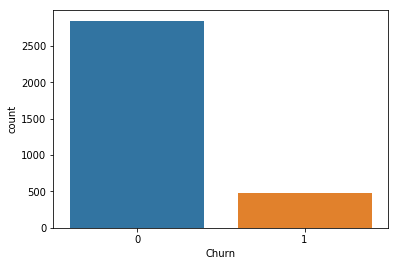

In [7]:
# Our label Distribution (countplot)
sns.countplot(data['Churn'])

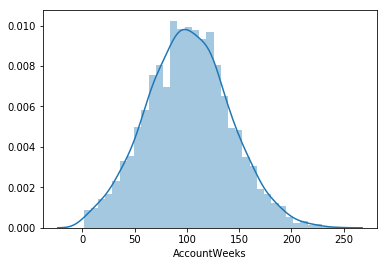

In [8]:
# Example EDA
sns.distplot(data['AccountWeeks'])

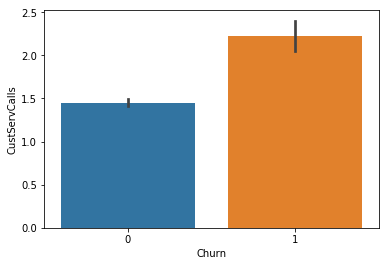

In [9]:
sns.barplot('Churn','CustServCalls', data = data)

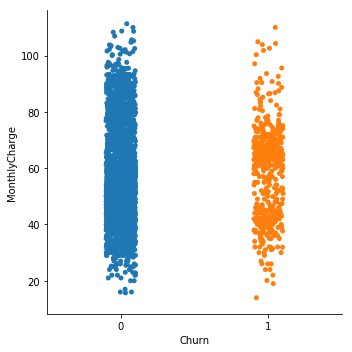

In [10]:
sns.catplot('Churn','MonthlyCharge', data = data)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [11]:
# to check for duplicated values
data.duplicated().sum()

0

In [12]:
data_1 = data.copy()
data_1.drop(['Churn'], axis = 1, inplace = True)
x = data_1
y = data['Churn']

In [13]:
# to check for outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))

In [14]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

414

In [15]:
from sklearn.preprocessing import RobustScaler
x_s = RobustScaler(quantile_range=(25,75)).fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s, y, test_size= 0.30, random_state = 42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

## LogisticRegression model

In [17]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(x_train,y_train)

C:\Users\Hafsah F. Anibaba\Anaconda364\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = my_model.predict(x_test)
pd.DataFrame(predictions).head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [19]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, predictions)
cm_log

array([[838,  19],
       [114,  29]], dtype=int64)

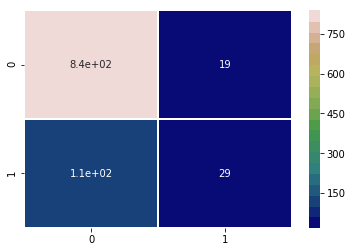

In [20]:
cmap = sns.mpl_palette("gist_earth",20)
sns.heatmap(cm_log, cmap = cmap, linewidths = 0.4, annot=True)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score*100)

86.7


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



In [42]:
from sklearn.model_selection import cross_validate
cv = cross_validate(my_model,x_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(x_test,y_test)))

Mean training accuracy: 0.8555491122885218
Test accuracy: 0.863


### No, there is neither overfitting nor underfittig

## Decision tree model

In [24]:
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x, y, test_size= 0.30, random_state = 42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train_2,y_train_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
pred_2 = dtree.predict(x_test_2)
pd.DataFrame(pred_2).head()

,0
0,0
1,0
2,1
3,0
4,0


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_2,pred_2)
cm

array([[789,  68],
       [ 49,  94]], dtype=int64)

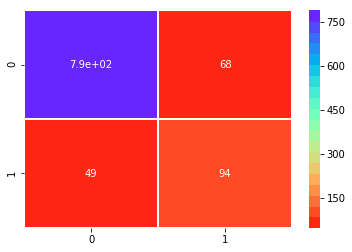

In [28]:
cmap = sns.mpl_palette('rainbow_r',20)
sns.heatmap(cm, cmap = cmap, linewidths = 0.3, annot=True)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_2,pred_2)
accuracy *100

88.3

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_2, pred_2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       857
           1       0.58      0.66      0.62       143

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.76      0.79      0.77      1000
weighted avg       0.89      0.88      0.89      1000



In [45]:
from sklearn.model_selection import cross_validate
cv = cross_validate(dtree,x_train_2,y_train_2,cv = 3, n_jobs=-1, return_estimator=True)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(x_test_2,y_test_2)))

Mean training accuracy: 0.8846958089576832
Test accuracy: 0.88


## Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train_2,y_train_2)

C:\Users\Hafsah F. Anibaba\Anaconda364\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
preda = rfc_model.predict(x_test_2)
pd.DataFrame(preda).head()

,0
0,0
1,0
2,1
3,0
4,0


In [33]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test_2,preda)
print(accu * 100)

92.60000000000001


In [34]:
from sklearn.metrics import confusion_matrix
acm = confusion_matrix(y_test_2,preda)
print(acm)

[[845  12]
 [ 62  81]]


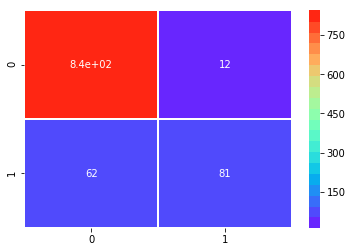

In [35]:
cmap = sns.mpl_palette('rainbow',20)
sns.heatmap(acm, cmap = cmap, linewidths = 0.3, annot=True)

In [36]:
from sklearn.metrics import classification_report
c1 = classification_report(y_test_2,preda)
print(c1)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       857
           1       0.87      0.57      0.69       143

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.90      0.78      0.82      1000
weighted avg       0.92      0.93      0.92      1000



In [47]:
from sklearn.model_selection import cross_validate
cv = cross_validate(rfc_model,x_train_2,y_train_2,cv = 3, n_jobs=-1, return_estimator=True)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(x_test_2,y_test_2)))

Mean training accuracy: 0.9254145030781745
Test accuracy: 0.923


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### Answer
* The best performing model is the <b> <i> RandomForestClassifier model </b> </i> as it has the highest accuracy and is not affected by outliers

 * The model can be improved by training it with more data